<a href="https://colab.research.google.com/github/usjay/tree_classifier_model/blob/main/tree_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.layers import Dropout, BatchNormalization

In [2]:
# Step 1: Upload the dataset
uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [3]:
# Step 2: Load the dataset
data = pd.read_csv("dataset.csv")

# Print the column names
print(data.columns)


Index(['Ratio', 'Angle1 ', 'Angle 2', 'Name'], dtype='object')


In [4]:
# Step 3: Preprocess data
# Update these column names based on the actual column names in your dataset
X = data[['Ratio', 'Angle1 ', 'Angle 2']]  # Selecting feature columns with correct names
y = data['Name']  # Selecting the label column

In [5]:
# Step 4: Encode categorical target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
# Step 5:Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 6:Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Step 7:Model architecture
model = Sequential()
model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(24, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [9]:
# Step 8: Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Step 9: Train model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,  # Start with a higher number of epochs
                    batch_size=64,
                    validation_split=0.2,

                   )

Epoch 1/100
5/5 [==============================] - 3s 72ms/step - loss: 1.4463 - accuracy: 0.3924 - val_loss: 1.0176 - val_accuracy: 0.5694
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 1.1601 - accuracy: 0.4583 - val_loss: 0.9843 - val_accuracy: 0.6250
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 1.0441 - accuracy: 0.4931 - val_loss: 0.9515 - val_accuracy: 0.6944
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.8446 - accuracy: 0.6215 - val_loss: 0.9176 - val_accuracy: 0.7361
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.7074 - accuracy: 0.6701 - val_loss: 0.8843 - val_accuracy: 0.7917
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 0.6054 - accuracy: 0.7361 - val_loss: 0.8516 - val_accuracy: 0.8472
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.4821 - accuracy: 0.8021 - val_loss: 0.8214 - val_accuracy: 0.8611
Epoch 8/100
5/5 [===

In [11]:
# Step 10: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 0.9667
Test Accuracy: 0.9667


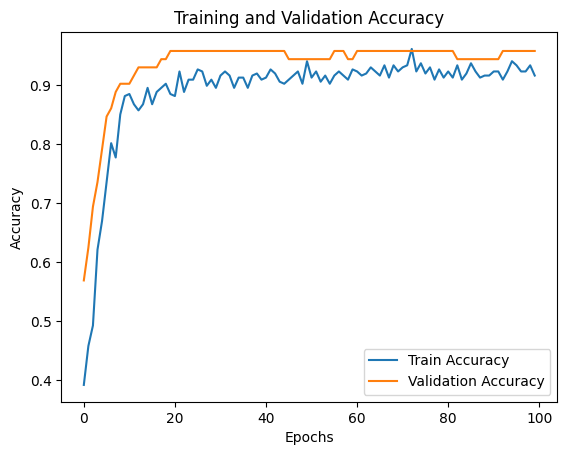

In [12]:
# Step 11: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [13]:
# Step 12: Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [14]:
# Step 13: Train model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,  # Start with a higher number of epochs
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                   )

Epoch 1/100
5/5 [==============================] - 0s 28ms/step - loss: 0.1867 - accuracy: 0.9375 - val_loss: 0.1730 - val_accuracy: 0.9444
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1804 - accuracy: 0.9132 - val_loss: 0.1744 - val_accuracy: 0.9444
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1989 - accuracy: 0.9306 - val_loss: 0.1748 - val_accuracy: 0.9444
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1781 - accuracy: 0.9132 - val_loss: 0.1724 - val_accuracy: 0.9444
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1832 - accuracy: 0.9306 - val_loss: 0.1707 - val_accuracy: 0.9444
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1722 - accuracy: 0.9410 - val_loss: 0.1705 - val_accuracy: 0.9444
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 0.1961 - accuracy: 0.9236 - val_loss: 0.1714 - val_accuracy: 0.9444
Epoch 8/100
5/5 [===

In [15]:
# step 14: Print the number of epochs used
print(f'Training stopped after {len(history.epoch)} epochs')

Training stopped after 11 epochs


In [20]:
# Step 15: Re Train model with early stopping
history = model.fit(X_train, y_train,
                    epochs=11,  # Start with a early stoping number of epochs
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                   )

Epoch 1/11
5/5 [==============================] - 0s 45ms/step - loss: 0.2298 - accuracy: 0.9097 - val_loss: 0.1708 - val_accuracy: 0.9444
Epoch 2/11
5/5 [==============================] - 0s 23ms/step - loss: 0.1662 - accuracy: 0.9306 - val_loss: 0.1706 - val_accuracy: 0.9444
Epoch 3/11
5/5 [==============================] - 0s 45ms/step - loss: 0.1783 - accuracy: 0.9375 - val_loss: 0.1713 - val_accuracy: 0.9444
Epoch 4/11
5/5 [==============================] - 0s 35ms/step - loss: 0.1745 - accuracy: 0.9271 - val_loss: 0.1701 - val_accuracy: 0.9444
Epoch 5/11
5/5 [==============================] - 0s 33ms/step - loss: 0.1890 - accuracy: 0.9132 - val_loss: 0.1688 - val_accuracy: 0.9444
Epoch 6/11
5/5 [==============================] - 0s 23ms/step - loss: 0.1858 - accuracy: 0.9236 - val_loss: 0.1690 - val_accuracy: 0.9444
Epoch 7/11
5/5 [==============================] - 0s 34ms/step - loss: 0.1978 - accuracy: 0.9306 - val_loss: 0.1698 - val_accuracy: 0.9444
Epoch 8/11
5/5 [===========

In [21]:
# Step 16: Evaluate Re traine model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 5ms/step - loss: 0.1107 - accuracy: 0.9667
Test Accuracy: 0.9667


In [ ]:

from sklearn.model_selection import GridSearchCV
# Assuming `model` is your trained model

# Step 17: Make predictions on the test set
predictions = model.predict(X_test)

# Convert the predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Decode the class labels if you used LabelEncoder
predicted_classes = label_encoder.inverse_transform(predicted_classes)

# Print some example predictions
for i in range(90):  # Print the first 90 predictions
    print(f"Predicted class: {predicted_classes[i]}, Actual class: {label_encoder.inverse_transform([y_test[i]])[0]}")


3/3 [==============================] - 0s 5ms/step
Predicted class: Maadan, Actual class: Maadan
Predicted class: Maadan, Actual class: Maadan
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Maadan, Actual class: Maadan
Predicted class: Christina, Actual class: Christina
Predicted class: Maadan, Actual class: Maadan
Predicted class: Maadan, Actual class: Maadan
Predicted class: Christina, Actual class: Christina
Predicted class: Christina, Actual class: Christina
Predicted class: Mee , Actual class: Mee 
Predicted class: Maadan, Actual class: Maadan
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Maadan, Actual class: Maadan
Predicted class: Mee , Actual class: Mee 
Predicted class: Christina, Actual class: Christina
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 
Predicted class: Mee , Actual class: Mee 